In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf
import math
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Data preparation

In [2]:
data =pd.read_csv('AirPassengers.csv')
data.head()

,Month,Passengers
0,Jan-49,112
1,Feb-49,118
2,Mar-49,132
3,Apr-49,129
4,May-49,121


In [3]:
data.shape

(144, 2)

In [4]:
data = data['Passengers']
data = np.array(data).reshape(-1,1) # n rows, 1 col

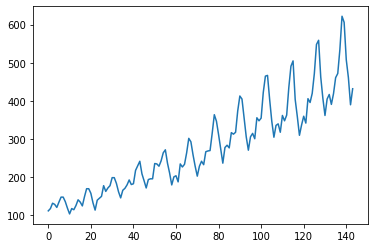

In [5]:
plt.plot(data)

In [6]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

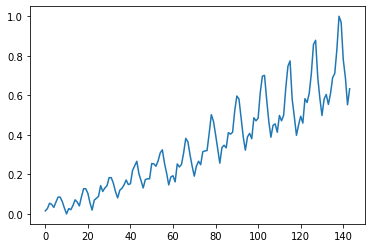

In [7]:
plt.plot(data)

In [8]:
train_size=100
test_size=44

In [9]:
train_set = data[0:train_size,:]
train_set.shape

(100, 1)

In [10]:
test_set = data[train_size:train_size+test_size,:]
test_set.shape

(44, 1)

In [11]:
train_set,test_set

(array([[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552],
        [0.04247104],
        [0.07142857],
        [0.05984556],
        [0.04054054],
        [0.08687259],
        [0.12741313],
        [0.12741313],
        [0.1042471 ],
        [0.05598456],
        [0.01930502],
        [0.06949807],
        [0.07915058],
        [0.08880309],
        [0.14285714],
        [0.11389961],
        [0.13127413],
        [0.14285714],
        [0.18339768],
        [0.18339768],
        [0.15444015],
        [0.11196911],
        [0.08108108],
        [0.11969112],
        [0.12934363],
        [0.14671815],
        [0.17181467],
        [0.14864865],
        [0.15250965],
        [0.22007722],
        [0.24324324],
        [0.26640927],
        [0.2027027 ],
        [0

In [12]:
def get_data(data,look_back):
    dataX,dataY=[],[]
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(data[i+look_back,0])
    return np.array(dataX),np.array(dataY)
# read the first 3 data for X, the 4th is y, that is, use 3 previous data to predict the current data
# for example
# X: 1e 2e 3e, y: 4e
# X: 2e 3e 4e, y: 5e
# size of each X is look_back

In [13]:
look_back=3
X_train,y_train=get_data(train_set,look_back)

In [14]:
X_train,y_train

(array([[0.01544402, 0.02702703, 0.05405405],
        [0.02702703, 0.05405405, 0.04826255],
        [0.05405405, 0.04826255, 0.03281853],
        [0.04826255, 0.03281853, 0.05984556],
        [0.03281853, 0.05984556, 0.08494208],
        [0.05984556, 0.08494208, 0.08494208],
        [0.08494208, 0.08494208, 0.06177606],
        [0.08494208, 0.06177606, 0.02895753],
        [0.06177606, 0.02895753, 0.        ],
        [0.02895753, 0.        , 0.02702703],
        [0.        , 0.02702703, 0.02123552],
        [0.02702703, 0.02123552, 0.04247104],
        [0.02123552, 0.04247104, 0.07142857],
        [0.04247104, 0.07142857, 0.05984556],
        [0.07142857, 0.05984556, 0.04054054],
        [0.05984556, 0.04054054, 0.08687259],
        [0.04054054, 0.08687259, 0.12741313],
        [0.08687259, 0.12741313, 0.12741313],
        [0.12741313, 0.12741313, 0.1042471 ],
        [0.12741313, 0.1042471 , 0.05598456],
        [0.1042471 , 0.05598456, 0.01930502],
        [0.05598456, 0.01930502, 0

In [15]:
X_test,y_test=get_data(test_set,look_back)

In [16]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [17]:
X_train.shape  # 96 sequences in train set, 3 timesteps for each sequence, 1 feature for each timestep

(96, 3, 1)

## Modeling

In [18]:
model=Sequential()
model.add(LSTM(5,input_shape=(look_back,1))) # 5 LSTM cells in the hidden layer   # Input: 3 timesteps, 1 feature
model.add(Dense(1)) # Regression task, "linear" activation by default
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,epochs=50,batch_size=1)  # batch_size=1: feed 1 seq a time

Train on 96 samples
Epoch 1/50
96/96 [==============================] - 4s 37ms/sample - loss: 0.0521
Epoch 2/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0180
Epoch 3/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0140
Epoch 4/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0122 0s - loss: 0
Epoch 5/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0105
Epoch 6/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0089
Epoch 7/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0073
Epoch 8/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0065
Epoch 9/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0057
Epoch 10/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0054
Epoch 11/50
96/96 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 12/50
96/96 [==============================] - 0s 3ms/sample - loss

## Evaluation

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred =scaler.inverse_transform(y_pred)

In [23]:
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

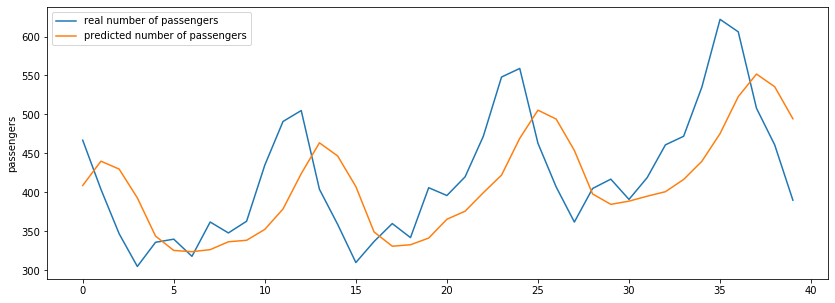

In [24]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real number of passengers')
plt.plot(y_pred,label='predicted number of passengers')
plt.ylabel('passengers')
plt.legend()
plt.show()